In [26]:
# in this model the features are not linearly dependent
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.decomposition import KernelPCA #Kernel Principle Component analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
x = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [8]:
x.shape

(400, 2)

In [9]:
y.shape

(400,)

Splitting data into training and test datasets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Feature scaling

In [15]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

Applying Kernel PCA

In [21]:
kpca = KernelPCA(n_components=2, kernel = 'rbf')

In [23]:
x_train_sc_kpca = kpca.fit_transform(x_train_sc)
x_test_sc_kpca = kpca.transform(x_test_sc)

Fitting Logistic Regression to the training set

In [25]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train_sc_kpca, y_train)
y_prediction = lr.predict(x_test_sc_kpca)

In [28]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

Visualising training and test sets

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


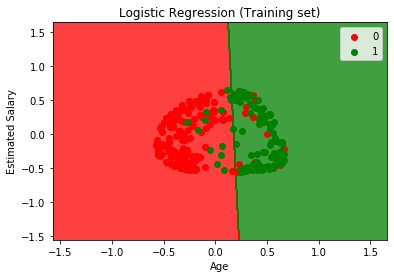

In [30]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_sc_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig('training_set.png', dip = 500)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


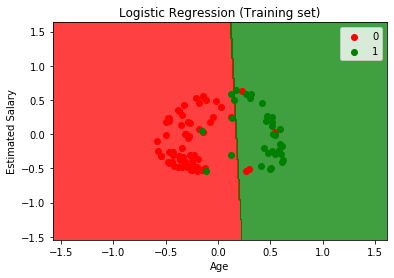

In [31]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_sc_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig('test_set.png', dip = 500)
plt.show()

Try to use PCA to see what the difference is between kernel PCA and PCA